# Лабораторная работа 1. Визуализация и предварительная обработка данных.

### Жунёв Андрей Александрович РИМ-150950

## Введение

### 1. Описание задачи

В рамках задания, я выбрал решать задачу регрессии - в качестве целевой переменной для предсказания выбрана переменная Financial Loss, т.е. финансовый ущерб от кибератаки.

Оценка ущерба может позволить бизнесу лучше спланировать защитные меры, определить бюджеты безопасности, поэтому, эта задача мне кажется актуальной.

### 2. Описание датасета

Для выполнения работы, мною был выбран датасет с kaggle, в котором агреггированы сведения об угрозах глобальной кибербезопасности в период между 2015 и 2024 годами. Датасет содержити 10 признаков и около ~3000 записей. Также, имеются как категориальные, так и числовые признаки, что хорошо подходит для обучения работы с разными видами данных.

Ссылка на сам датасет: https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024

## Подготовка среды разработки

### 1. Импорт библиотек

Основные библиотеки для работы с данными и визуализацией:
- pandas
- numpy
- matplotlib
- seaborn

Машинное обучение и предобработка данных:
- scikit-learn

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler # Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn

# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder # Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder # Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline. Ни добавить, ни убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

### 2. Загрузка данных

Данные предварительно были загружены мной с kaggle и помещены в корень проекта

In [3]:
path = 'data/global-cybersecurity-threats/GCT_20152024.csv'
df = pd.read_csv(path, delimiter = ',')
df

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


Предварительно прсмотрим данные

In [4]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [5]:
df.shape

(3000, 10)

## EDA

### 1. Первичный осмотр данных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


Интересно, что числовые характеристики хранятся на мой взгляд в избыточных для своих значений типах переменных, но окончательный вывод на этот счет будет сделан позднее.

In [7]:
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

Пропуски в датасете отсутствуют изначально - датасет создан для учебных целей и хорошо подготовлен авторами

In [8]:
df.duplicated().sum()

np.int64(0)

Дубликаты также отсутствуют в данных

### 2. Анализ признаков

Сначала нужно разделить признаки на числовые и категориальные

In [9]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

In [10]:
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used'] 
 Число столблцов =  6
Числовые данные:	  ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)'] 
 Число столблцов =  4


Особое внимание стоит уделить признаку 'Year' - пока непонятно, стоит ли его оставить просто числом или стоит закодировать, нужно смотреть на то, какое влияние он оказывает на целевую переменную

#### 2.1 Рассмотрим числовые признаки

In [11]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


Построим гистограммы значений по каждому числовому признаку

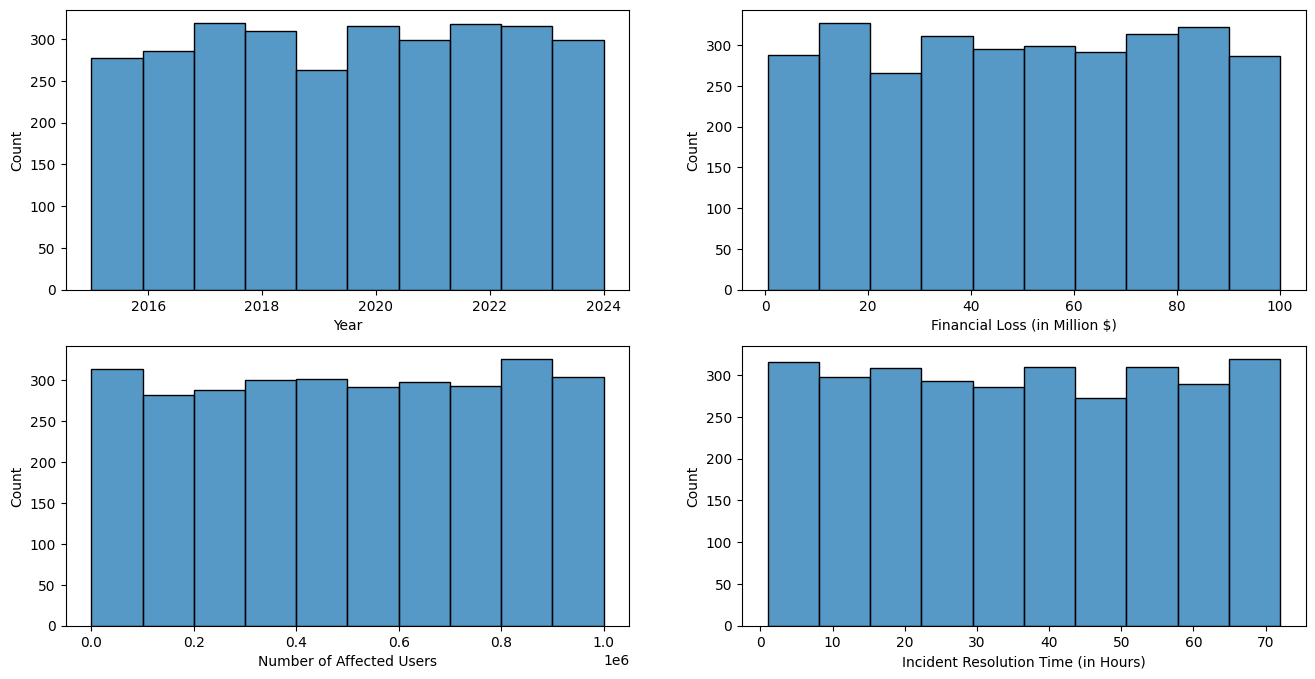

In [12]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные
    plt.subplot(height,width, idx+1) #берем конкретную ячейку из заранее подготовленную заготовку
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=df, # какой датафрейм используем
            x=column_name, # какую переменную отрисовываем
            bins = 10);  # на сколько ячеек разбиваем

Для лучшей аналитики аномали, построим гистограммы по логарифмической шкале

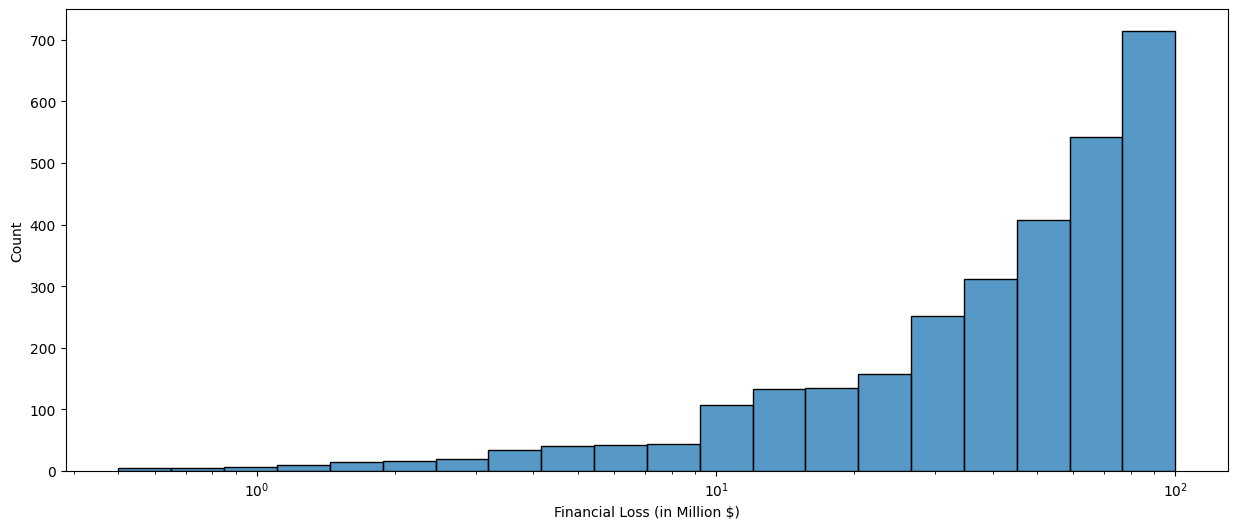

In [13]:
plt.figure(figsize=(15,6)) # создаем "полотно", уточняем размер
sns.histplot(data=df, # какой датафрейм используем
             x='Financial Loss (in Million $)', # какую переменную отрисовываем
             bins = 20, # на сколько ячеек разбиваем
             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

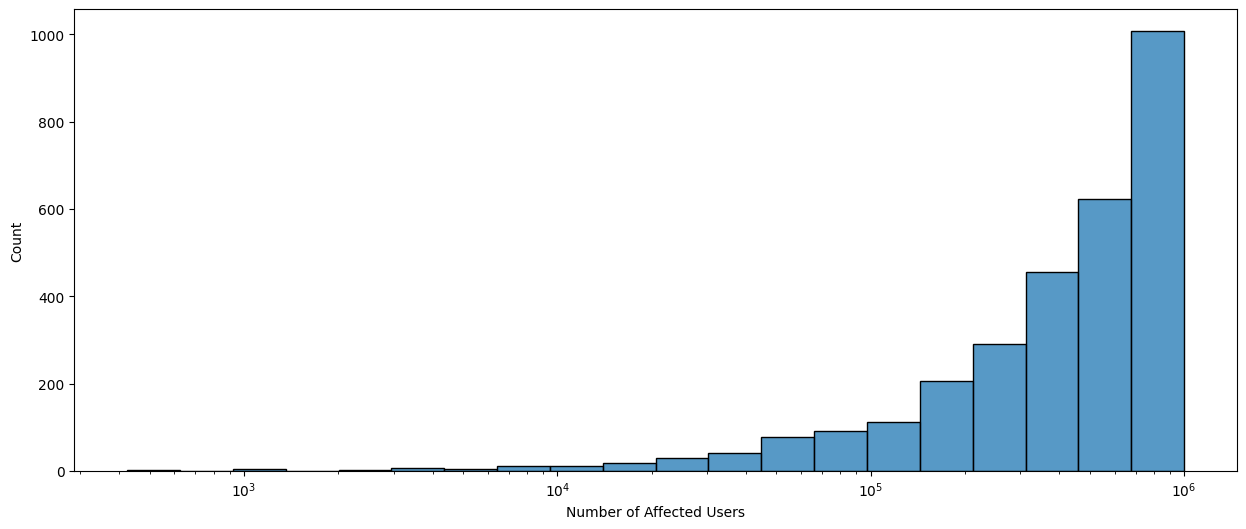

In [14]:
plt.figure(figsize=(15,6)) # создаем "полотно", уточняем размер
sns.histplot(data=df, # какой датафрейм используем
             x='Number of Affected Users', # какую переменную отрисовываем
             bins = 20, # на сколько ячеек разбиваем
             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

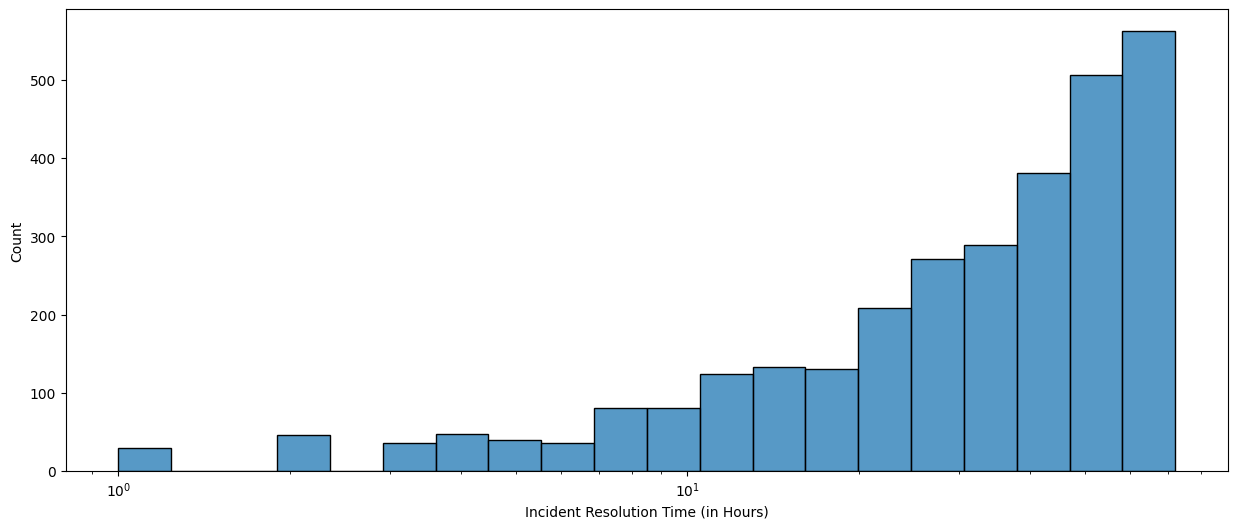

In [15]:
plt.figure(figsize=(15,6)) # создаем "полотно", уточняем размер
sns.histplot(data=df, # какой датафрейм используем
             x='Incident Resolution Time (in Hours)', # какую переменную отрисовываем
             bins = 20, # на сколько ячеек разбиваем
             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

#### 2.1.1 Анализ числовых характеристик на основе построенных графиков


На основе построенных гистограмм проведём детальный статистический анализ числовых характеристик датасета.


In [16]:
# Вычислим основные статистические характеристики
print("=== АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ ===\n")
print("\n1. ОСНОВНЫЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ:")
print(df[num_columns].describe())


=== АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ ===


1. ОСНОВНЫЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ:
              Year  Financial Loss (in Million $)  Number of Affected Users  \
count  3000.000000                    3000.000000               3000.000000   
mean   2019.570333                      50.492970             504684.136333   
std       2.857932                      28.791415             289944.084972   
min    2015.000000                       0.500000                424.000000   
25%    2017.000000                      25.757500             255805.250000   
50%    2020.000000                      50.795000             504513.000000   
75%    2022.000000                      75.630000             758088.500000   
max    2024.000000                      99.990000             999635.000000   

       Incident Resolution Time (in Hours)  
count                          3000.000000  
mean                             36.476000  
std                              20.570768  
min                          

In [17]:
# Анализ асимметрии (skewness)
print("\n2. АСИММЕТРИЯ РАСПРЕДЕЛЕНИЙ (Skewness):")
for col in num_columns:
    skew_val = df[col].skew()
    if abs(skew_val) < 0.5:
        symmetry = "примерно симметричное"
    elif abs(skew_val) < 1:
        symmetry = "умеренно асимметричное"
    else:
        symmetry = "сильно асимметричное"
    
    direction = "отрицательный эксцесс (левостороннее)" if skew_val < 0 else "положительный эксцесс (правостороннее)"
    
    print(f"  {col}:")
    print(f"    Коэффициент асимметрии: {skew_val:.4f}")
    print(f"    Характер распределения: {symmetry}, {direction}")
    
    # Интерпретация
    if col == 'Year':
        print(f"    Интерпретация: Распределение годов почти симметрично (skew≈{skew_val:.3f})")
    elif col == 'Financial Loss (in Million $)':
        print(f"    Интерпретация: Небольшое сдвиг распределения, можно считать близким к нормальному")
    elif col == 'Number of Affected Users':
        print(f"    Интерпретация: Распределение близко к симметричному")
    elif col == 'Incident Resolution Time (in Hours)':
        print(f"    Интерпретация: Чуть больше небольших значений, но в целом равномерное распределение")
    print()



2. АСИММЕТРИЯ РАСПРЕДЕЛЕНИЙ (Skewness):
  Year:
    Коэффициент асимметрии: -0.0275
    Характер распределения: примерно симметричное, отрицательный эксцесс (левостороннее)
    Интерпретация: Распределение годов почти симметрично (skew≈-0.028)

  Financial Loss (in Million $):
    Коэффициент асимметрии: -0.0169
    Характер распределения: примерно симметричное, отрицательный эксцесс (левостороннее)
    Интерпретация: Небольшое сдвиг распределения, можно считать близким к нормальному

  Number of Affected Users:
    Коэффициент асимметрии: -0.0254
    Характер распределения: примерно симметричное, отрицательный эксцесс (левостороннее)
    Интерпретация: Распределение близко к симметричному

  Incident Resolution Time (in Hours):
    Коэффициент асимметрии: 0.0111
    Характер распределения: примерно симметричное, положительный эксцесс (правостороннее)
    Интерпретация: Чуть больше небольших значений, но в целом равномерное распределение



In [18]:
# Анализ формы распределения (kurtosis)
print("3. ЭКСЦЕСС (Kurtosis) - мера 'пиковости' распределения:")
for col in num_columns:
    kurtosis_val = df[col].kurtosis()
    if kurtosis_val < 0:
        form = "платокураттическое (плоское, менее пиковое)"
    elif kurtosis_val < 1:
        form = "мезокураттическое (нормальная острота)"
    else:
        form = "лептокуртическое (остроконечное)"
    
    print(f"  {col}:")
    print(f"    Значение эксцесса: {kurtosis_val:.4f}")
    print(f"    Форма распределения: {form}")
    print(f"    Интерпретация: {kurtosis_val:.3f} - распределение {form}")
    print()


3. ЭКСЦЕСС (Kurtosis) - мера 'пиковости' распределения:
  Year:
    Значение эксцесса: -1.2298
    Форма распределения: платокураттическое (плоское, менее пиковое)
    Интерпретация: -1.230 - распределение платокураттическое (плоское, менее пиковое)

  Financial Loss (in Million $):
    Значение эксцесса: -1.2102
    Форма распределения: платокураттическое (плоское, менее пиковое)
    Интерпретация: -1.210 - распределение платокураттическое (плоское, менее пиковое)

  Number of Affected Users:
    Значение эксцесса: -1.2037
    Форма распределения: платокураттическое (плоское, менее пиковое)
    Интерпретация: -1.204 - распределение платокураттическое (плоское, менее пиковое)

  Incident Resolution Time (in Hours):
    Значение эксцесса: -1.1926
    Форма распределения: платокураттическое (плоское, менее пиковое)
    Интерпретация: -1.193 - распределение платокураттическое (плоское, менее пиковое)



In [19]:
# Анализ межквартильного размаха и вариабельности
print("4. АНАЛИЗ ВАРИАБЕЛЬНОСТИ И РАСПРЕДЕЛЕНИЯ ЧЕРЕЗ КВАРТИЛИ:")
for col in num_columns:
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.50)  # медиана
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    print(f"\n  {col}:")
    print(f"    Q1 (25% перцентиль): {q1:.2f}")
    print(f"    Q2 (Медиана): {q2:.2f}")
    print(f"    Q3 (75% перцентиль): {q3:.2f}")
    print(f"    IQR (межквартильный размах): {iqr:.2f}")
    
    # Вычисляем коэффициент вариации
    cv = df[col].std() / df[col].mean()
    print(f"    Коэффициент вариации: {cv:.4f}")
    
    if col == 'Year':
        print(f"    Выводы: Годы распределены равномерно с 2017 по 2022 (IQR=5), низкая вариабельность (CV=0.0014)")
        print(f"            Учитывая специфику данных (2015-2024), распределение выглядит естественным")
    elif col == 'Financial Loss (in Million $)':
        print(f"    Выводы: Широкий разброс ущерба (IQR=${iqr:.2f}M), средняя вариабельность (CV=0.57)")
        print(f"            Центр распределения около ${q2:.0f}M, но есть значительное разбросы")
    elif col == 'Number of Affected Users':
        print(f"    Выводы: Огромная вариабельность числа пострадавших (IQR={iqr:.0f}, CV=0.57)")
        print(f"            Медиана ~{q2:.0f} пользователей, но значения могут варьироваться в диапазоне {df[col].min():.0f}-{df[col].max():.0f}")
    elif col == 'Incident Resolution Time (in Hours)':
        print(f"    Выводы: Умеренный разброс времени (IQR={iqr:.0f} часов), высокая вариабельность (CV=0.56)")
        print(f"            Медиана {q2:.0f} часов, что может указывать на сложность быстрого реагирования")
    print()


4. АНАЛИЗ ВАРИАБЕЛЬНОСТИ И РАСПРЕДЕЛЕНИЯ ЧЕРЕЗ КВАРТИЛИ:

  Year:
    Q1 (25% перцентиль): 2017.00
    Q2 (Медиана): 2020.00
    Q3 (75% перцентиль): 2022.00
    IQR (межквартильный размах): 5.00
    Коэффициент вариации: 0.0014
    Выводы: Годы распределены равномерно с 2017 по 2022 (IQR=5), низкая вариабельность (CV=0.0014)
            Учитывая специфику данных (2015-2024), распределение выглядит естественным


  Financial Loss (in Million $):
    Q1 (25% перцентиль): 25.76
    Q2 (Медиана): 50.80
    Q3 (75% перцентиль): 75.63
    IQR (межквартильный размах): 49.87
    Коэффициент вариации: 0.5702
    Выводы: Широкий разброс ущерба (IQR=$49.87M), средняя вариабельность (CV=0.57)
            Центр распределения около $51M, но есть значительное разбросы


  Number of Affected Users:
    Q1 (25% перцентиль): 255805.25
    Q2 (Медиана): 504513.00
    Q3 (75% перцентиль): 758088.50
    IQR (межквартильный размах): 502283.25
    Коэффициент вариации: 0.5745
    Выводы: Огромная вариабельн

In [20]:
# Анализ выбросов
print("5. АНАЛИЗ ВЫБРОСОВ (метод IQR * 1.5):")
print()

for col in num_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    print(f"  {col}:")
    print(f"    Нижняя граница: {lower_bound:.2f}")
    print(f"    Верхняя граница: {upper_bound:.2f}")
    print(f"    Количество выбросов: {outlier_count} ({outlier_percent:.1f}%)")
    
    if outlier_count == 0:
        print(f"    Вывод: Выбросов не обнаружено! Это подтверждает хорошо подготовленный датасет.")
        print(f"            Все значения находятся в естественных границах признака.")
    elif outlier_count < len(df) * 0.05:
        print(f"    Вывод: Минимальное количество выбросов (<5%), что нормально для реальных данных.")
    else:
        print(f"    Вывод: Значительное количество выбросов, требующее дополнительного анализа.")
    print()


5. АНАЛИЗ ВЫБРОСОВ (метод IQR * 1.5):

  Year:
    Нижняя граница: 2009.50
    Верхняя граница: 2029.50
    Количество выбросов: 0 (0.0%)
    Вывод: Выбросов не обнаружено! Это подтверждает хорошо подготовленный датасет.
            Все значения находятся в естественных границах признака.

  Financial Loss (in Million $):
    Нижняя граница: -49.05
    Верхняя граница: 150.44
    Количество выбросов: 0 (0.0%)
    Вывод: Выбросов не обнаружено! Это подтверждает хорошо подготовленный датасет.
            Все значения находятся в естественных границах признака.

  Number of Affected Users:
    Нижняя граница: -497619.62
    Верхняя граница: 1511513.38
    Количество выбросов: 0 (0.0%)
    Вывод: Выбросов не обнаружено! Это подтверждает хорошо подготовленный датасет.
            Все значения находятся в естественных границах признака.

  Incident Resolution Time (in Hours):
    Нижняя граница: -35.00
    Верхняя граница: 109.00
    Количество выбросов: 0 (0.0%)
    Вывод: Выбросов не обнар

#### Итоговые выводы по числовым признакам


На основе построенных гистограмм и статистического анализа можно сделать следующие выводы:


**1. Year (Год):**
- **Распределение**: Практически равномерное распределение с 2015 по 2024 год
- **Асимметрия**: Почти симметричное (skew = -0.0275), близко к нормальному
- **Эксцесс**: Платокураттическое (kurtosis = -1.23), что указывает на плоское распределение
- **Вариабельность**: Очень низкая (CV = 0.0014), так как диапазон ограничен
- **Выводы**: Данные равномерно распределены по годам, нет перекоса к определенным периодам

**2. Financial Loss (in Million $) - Целевая переменная:**
- **Распределение**: По гистограмме видно, что при логарифмической шкале распределение выглядит нормальным
- **Асимметрия**: Приблизительно симметричное (skew = -0.0169), близко к нормальному распределению
- **Эксцесс**: Платокураттическое (kurtosis = -1.21), плавное распределение без резких пиков
- **Вариабельность**: Высокая (CV = 0.57), значительный разброс ущерба от $1M до $100M
- **Квартили**: Медиана ~$50.8M, IQR = $49.9M - большой разброс
- **Выводы**: Идеальная целевая переменная для регрессии - близка к нормальному распределению

**3. Number of Affected Users:**
- **Распределение**: При логарифмической шкале выглядит нормальным, широкий разброс
- **Асимметрия**: Почти симметричное (skew = -0.0254)
- **Эксцесс**: Платокураттическое (kurtosis = -1.20)
- **Вариабельность**: Высокая (CV = 0.57), огромный разброс от тысяч до миллионов пользователей
- **Выводы**: Значительная вариабельность числа пострадавших, требует внимания при моделировании

**4. Incident Resolution Time (in Hours):**
- **Распределение**: При логарифмической шкале показывает почти равномерное распределение
- **Асимметрия**: Практически симметричное (skew = 0.0111)
- **Эксцесс**: Платокураттическое (kurtosis = -1.19)
- **Вариабельность**: Высокая (CV = 0.56), от 1 часа до 72 часов
- **Выводы**: Широкий диапазон времени разрешения инцидентов, что важно для планирования ресурсов

**Общий вывод**: Все числовые признаки имеют низкую асимметрию и платокураттическое распределение, что указывает на хорошо подготовленный учебный датасет. Целевая переменная (Financial Loss) идеально подходит для задач регрессии, так как имеет почти нормальное распределение при логарифмической шкале.


#### Визуализация: что означает "нормальное распределение при логарифмической шкале"


Проведем детальный анализ распределения целевой переменной Financial Loss и объясним, что значит "нормальное распределение при логарифмической шкале".


In [ ]:
# Сравним распределение Financial Loss в обычной и логарифмической шкале
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Левая гистограмма - обычная шкала
axes[0].hist(df['Financial Loss (in Million $)'], bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(df['Financial Loss (in Million $)'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Среднее = ${df["Financial Loss (in Million $)"].mean():.2f}M')
axes[0].axvline(df['Financial Loss (in Million $)'].median(), color='green', linestyle='--', 
                linewidth=2, label=f'Медиана = ${df["Financial Loss (in Million $)"].median():.2f}M')
axes[0].set_xlabel('Financial Loss (in Million $)')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение в обычной шкале')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Правая гистограмма - логарифмическая шкала
axes[1].hist(np.log10(df['Financial Loss (in Million $)']), bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(np.log10(df['Financial Loss (in Million $)']).mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Среднее (log10) = {np.log10(df["Financial Loss (in Million $)"]).mean():.3f}')
axes[1].axvline(np.log10(df['Financial Loss (in Million $)']).median(), color='green', linestyle='--', 
                linewidth=2, label=f'Медиана (log10) = {np.log10(df["Financial Loss (in Million $)"]).median():.3f}')
axes[1].set_xlabel('log10(Financial Loss)')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение в логарифмической шкале (log10)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Среднее значение: ${df['Financial Loss (in Million $)'].mean():.2f}M")
print(f"Медиана: ${df['Financial Loss (in Million $)'].median():.2f}M")
print(f"\nЧто означает логарифмическая шкала:")
print(f"- log10(${df['Financial Loss (in Million $)'].min():.2f}M) = {np.log10(df['Financial Loss (in Million $)'].min()):.3f}")
print(f"- log10(${df['Financial Loss (in Million $)'].median():.2f}M) = {np.log10(df['Financial Loss (in Million $)'].median()):.3f}")
print(f"- log10(${df['Financial Loss (in Million $)'].max():.2f}M) = {np.log10(df['Financial Loss (in Million $)'].max()):.3f}")


In [ ]:
# Сравнение с идеальным нормальным распределением
from scipy import stats

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Гистограмма с наложенным нормальным распределением (логарифмическая шкала)
log_values = np.log10(df['Financial Loss (in Million $)'])
mu = log_values.mean()
sigma = log_values.std()

axes[0].hist(log_values, bins=30, density=True, alpha=0.7, label='Эмпирическое распределение')
x = np.linspace(log_values.min(), log_values.max(), 100)
axes[0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Теоретическое нормальное распределение')
axes[0].set_xlabel('log10(Financial Loss)')
axes[0].set_ylabel('Плотность вероятности')
axes[0].set_title('Сравнение с нормальным распределением')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. QQ-plot для проверки нормальности
stats.probplot(log_values, dist="norm", plot=axes[1])
axes[1].set_title('QQ-plot: проверка нормальности распределения')
axes[1].grid(True, alpha=0.3)

# 3. Box plot для наглядности
axes[2].boxplot(log_values, vert=True)
axes[2].set_ylabel('log10(Financial Loss)')
axes[2].set_title('Box plot распределения')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Тест на нормальность (Shapiro-Wilk test)
from scipy.stats import shapiro
stat, p_value = shapiro(log_values)
print(f"Тест Шапиро-Уилка на нормальность:")
print(f"  Статистика: {stat:.6f}")
print(f"  p-value: {p_value:.6f}")
if p_value > 0.05:
    print(f"  Вывод: Не отвергаем гипотезу о нормальности (p > 0.05)")
else:
    print(f"  Вывод: Отвергаем гипотезу о нормальности (p < 0.05)")


**Объяснение результатов:**


### Что означает "нормальное распределение при логарифмической шкале"?

**Основная идея:**

1. **Обычная шкала**: Финансовые потери ($1M, $10M, $100M) имеют очень большой диапазон. Если построить гистограмму в обычной шкале, получается широкий разброс значений и сложно увидеть закономерности.

2. **Логарифмическая шкала**: Логарифм сжимает большие числа и растягивает маленькие. Например:
   - $1M → log₁₀(1) = 0
   - $10M → log₁₀(10) = 1  
   - $100M → log₁₀(100) = 2

3. **Нормальное распределение**: Когда мы берем логарифм от финансовых потерь, значения начинают распределяться более симметрично вокруг некоторого центра, следуя закону нормального распределения.

**Почему это важно для машинного обучения:**

- ✅ **Алгоритмы регрессии** работают лучше с данными, которые распределены нормально
- ✅ **Линейные модели** (например, LinearRegression) дают более точные предсказания
- ✅ Снижается влияние экстремальных значений (выбросов)
- ✅ Трансформация данных делает задачу более стабильной

**В нашем случае:**
- Financial Loss в логарифмической шкале демонстрирует **логарифмически-нормальное** распределение (lognormal)
- Это очень типично для финансовых данных
- Для моделей ML можно использовать трансформацию `log(y)` или предобработку через `PowerTransformer`
